---
---
Granovetter's (1978) threshold model 
---
---

The following code implements the cobweb diagram of Granovetter's (1978) threshold model 

Replication using the R language By Yen-Sheng Chiang and James Kitts, 2005

Replication using the Python language By Cheng-Jun Wang, 2020

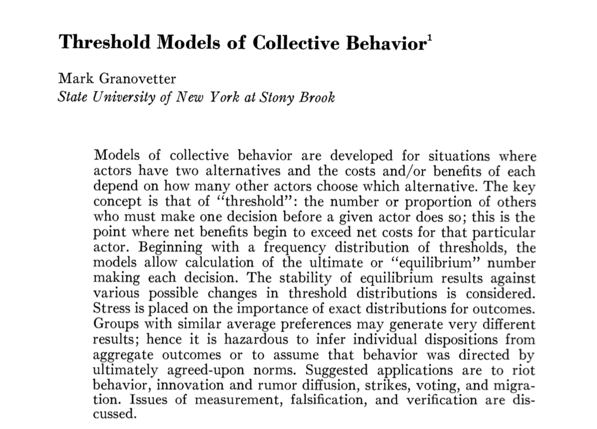

- Thresholds  $x$
- Frequency distribution $f(x)$
- The cumulative distribution function (CDF) $F(x)$

Denote the proportion of the population who have joined a riot by time $t$ as $r(t)$.

Those whose threshold smaller than $r(t)$ will join in the riot at time $t+1$, therefore:

$$r(t+1) = F(r(t))$$

Setting $r(t+1) = r(t)$, the equlibirium outcome may be found.





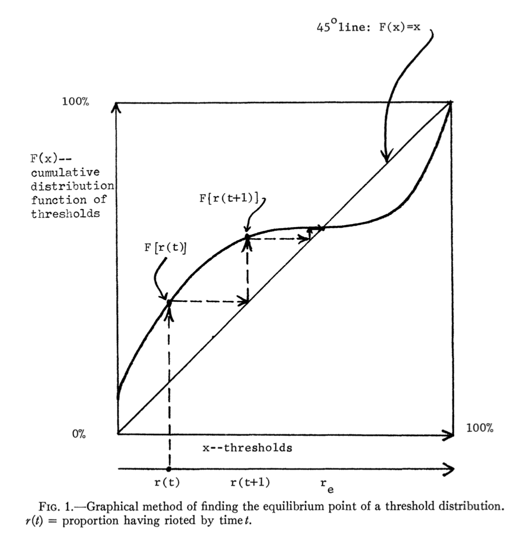

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
# SETTINGS HERE
Mean		    = 0.25	# the mean of the (normal) distribution of thresholds	
Standard_Deviation  = 0.15	# the standard deviation of the normal distribution
Starting_Point	    = 0.13	# the starting point of the cobweb diagram 
Max_Iterations	    = 30  	# the number of iterations for the cobweb diagram 

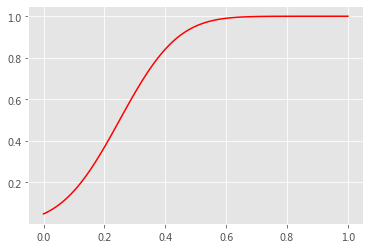

In [84]:
X = np.linspace(0, 1, 100) # 100x1 linearly-spaced vector in [0,1]
Z = norm.cdf(X, Mean, Standard_Deviation)
plt.plot(X, Z, 'r-')
plt.show()

In [33]:
X_List=[] # prepare a list to collect the x-coordinate data 
Y_List=[] # prepare a list to collect the y-coordinate data 
x_point=Starting_Point  # the x coordinate of the second point is the same as the starting point 

In [34]:
for i in range(Max_Iterations):
    y_point = norm.cdf(x_point, Mean, Standard_Deviation)
    X_List.append(x_point) # record the x coordinate
    X_List.append(y_point) # the x coordinate of the point on 45 degree line
    Y_List.append(y_point) # record the y coordinate
    Y_List.append(y_point) # the y coordinate of the point on 45 degree line
    x_point = y_point

In [35]:
ymin = min(min(X), min(Z))
ymax = max(max(X), max(Z)) 

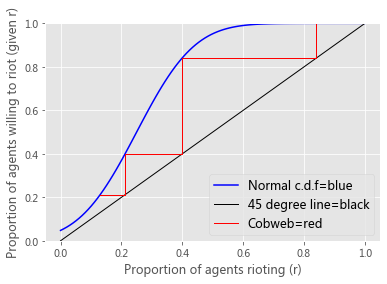

In [57]:
plt.plot(X,Z,'b-', label = "Normal c.d.f=blue")
plt.xlabel("Proportion of agents rioting (r)")
plt.ylabel("Proportion of agents willing to riot (given r)")
plt.ylim([ymin,ymax])
plt.plot(X,X, color='black', linestyle='-',linewidth=1, 
         label = "45 degree line=black")# plot 45 degree line
plt.plot(X_List,Y_List, linestyle='-',linewidth=1,
         color="red", label = "Cobweb=red")  # plot the cobweb diagram                          
plt.legend(fontsize = 12)
plt.show()

In [6]:
def plot_threshold_model(Mean, Standard_Deviation, Starting_Point, Max_Iterations):
    # write a function called plot_threshold_model 
    X = np.linspace(0, 1, 100) 
    Z = norm.cdf(X, Mean, Standard_Deviation)
    plt.plot(X, Z, 'r-')
    X_List=[]  
    Y_List=[]  
    x_point=Starting_Point
    for i in range(Max_Iterations):
        y_point = norm.cdf(x_point, Mean, Standard_Deviation)
        X_List.append(x_point) 
        X_List.append(y_point) 
        Y_List.append(y_point) 
        Y_List.append(y_point) 
        x_point = y_point
    ymin = min(min(X), min(Z))
    ymax = max(max(X), max(Z)) 
    plt.plot(X,Z,'b-', label = "Normal c.d.f=blue")
    plt.xlabel("Proportion of agents rioting (r)")
    plt.ylabel("Proportion of agents willing to riot (given r)")
    plt.ylim([ymin,ymax])
    plt.plot(X,X, color='black', linestyle='-',linewidth=1, 
         label = "45 degree line=black")
    plt.plot(X_List,Y_List, linestyle='-',linewidth=1,
         color="red", label = "Cobweb=red")                           
    plt.legend(fontsize = 12)
    plt.show()

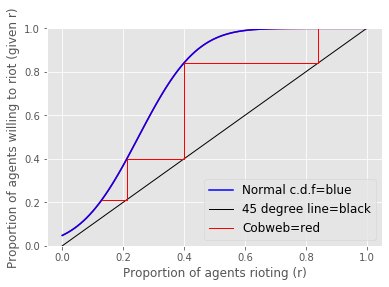

In [7]:
plot_threshold_model(0.25, 0.15, 0.13, 30)

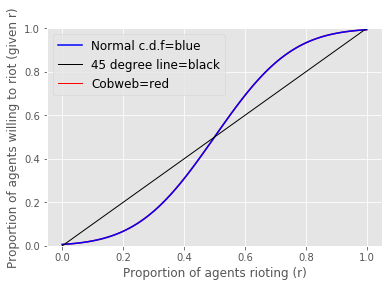

In [10]:
# change the parameters and add into the function blow
plot_threshold_model(0.5, 0.2, 0.5, 20)

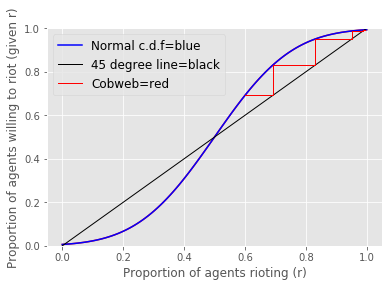

In [11]:
# change the parameters and add into the function blow

plot_threshold_model(0.5, 0.2, 0.6, 20)

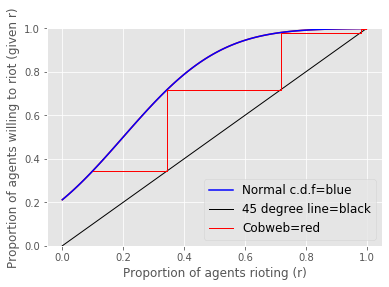

In [26]:
# change the parameters and add into the function blow

plot_threshold_model(0.2, 0.25, 0.1, 50)

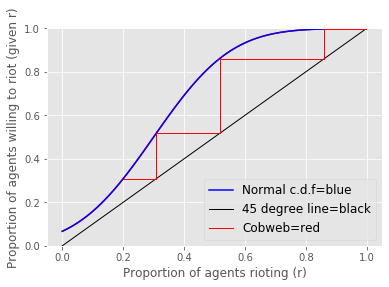

In [23]:
# change the parameters and add into the function blow

plot_threshold_model(0.3, 0.2, 0.2, 30)

## Power Law Distribution

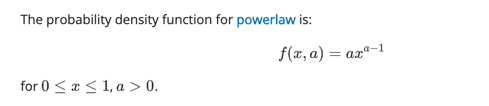

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.powerlaw.html#scipy.stats.powerlaw

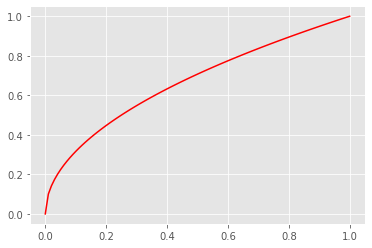

In [28]:
from scipy.stats import powerlaw

X = np.linspace(0, 1, 100) # 100x1 linearly-spaced vector in [0,1]
a = 0.5
Z = powerlaw.cdf(X, a)
plt.plot(X, Z, 'r-')
# plt.xscale('log')
# plt.yscale('log')
plt.show()


In [36]:
def plot_threshold_model_powerlaw(a, Starting_Point, Max_Iterations):
    from scipy.stats import powerlaw
    # write a function called plot_threshold_model_powerlaw
    # Assume that the threshold follows a powerlaw distribution
    X = np.linspace(0, 1, 100)
    Z = powerlaw.cdf(X, a)
    X_List=[]  
    Y_List=[]  
    x_point=Starting_Point
    for i in range(Max_Iterations):
        y_point = powerlaw.cdf(X, a)
        X_List.append(x_point) 
        X_List.append(y_point) 
        Y_List.append(y_point) 
        Y_List.append(y_point) 
        x_point = y_point
    ymin = min(min(X), min(Z))
    ymax = max(max(X), max(Z)) 
    plt.plot(X,Z,'b-', label = "Powerlaw c.d.f=blue")
    plt.xlabel("Proportion of agents rioting (r)")
    plt.ylabel("Proportion of agents willing to riot (given r)")
    plt.ylim([ymin,ymax])
    plt.plot(X,X, color='black', linestyle='-',linewidth=1, 
         label = "45 degree line=black")
    plt.plot(X_List,Y_List, linestyle='-',linewidth=1,
         color="red", label = "Cobweb=red")                           
    plt.legend(fontsize = 12)
    plt.show()

ValueError: setting an array element with a sequence.

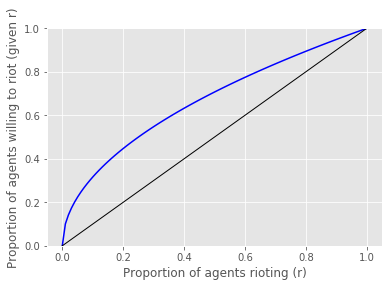

In [37]:
plot_threshold_model_powerlaw(0.5, 0.13, 30)

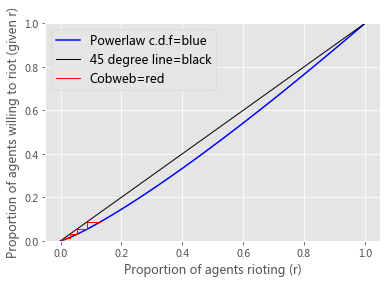

In [109]:
# change the parameters and add into the function blow

plot_threshold_model_powerlaw(0.4, )

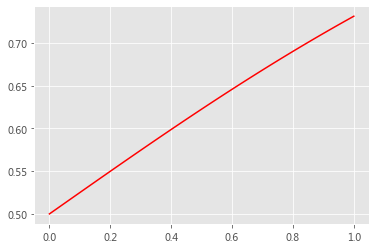

In [126]:
from scipy.stats import logistic

X = np.linspace(0, 1, 100) # 100x1 linearly-spaced vector in [0,1]
Z = logistic.cdf(X)
plt.plot(X, Z, 'r-')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [38]:
def plot_threshold_model_logistic(Starting_Point, Max_Iterations):
    from scipy.stats import logistic
    # write a function called plot_threshold_model_logistic
    # Assume that the threshold follows a logistic distribution
    X = np.linspace(0, 1, 100)
    Z = logistic.cdf(X, a)
    X_List=[]  
    Y_List=[]  
    x_point=Starting_Point
    for i in range(Max_Iterations):
        y_point = logistic.cdf(X, a)
        X_List.append(x_point) 
        X_List.append(y_point) 
        Y_List.append(y_point) 
        Y_List.append(y_point) 
        x_point = y_point
    ymin = min(min(X), min(Z))
    ymax = max(max(X), max(Z)) 
    plt.plot(X,Z,'b-', label = "logistic c.d.f=blue")
    plt.xlabel("Proportion of agents rioting (r)")
    plt.ylabel("Proportion of agents willing to riot (given r)")
    plt.ylim([ymin,ymax])
    plt.plot(X,X, color='black', linestyle='-',linewidth=1, 
         label = "45 degree line=black")
    plt.plot(X_List,Y_List, linestyle='-',linewidth=1,
         color="red", label = "Cobweb=red")                           
    plt.legend(fontsize = 12)
    plt.show()

ValueError: setting an array element with a sequence.

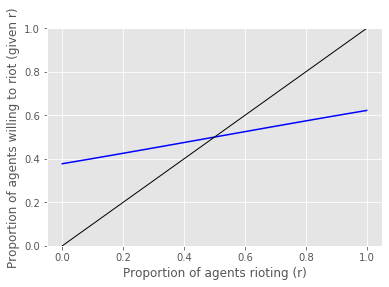

In [40]:
# change the parameters and add into the function blow

plot_threshold_model_logistic(0.3, 30)